In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [21]:
df = pd.read_csv('/content/volatility.csv', parse_dates=['date'])

In [22]:
df.head()

Unnamed: 0  actual     model       date
0           0     0.0  0.245465 2018-05-08
1           1     0.0  0.239525 2018-06-08
2           2     0.0  0.232408 2018-07-08
3           3     0.0  0.229499 2018-08-08
4           4     0.0  0.228595 2018-09-08

In [23]:
df = df.sort_values(by='date') # sorted all values according to the column date 
     

In [24]:
dff = df.sort_values(by='date') # sorted all values according to the column date 


In [25]:
dff

Unnamed: 0    actual     model       date
36           36  0.059142  0.175513 2018-01-10
59           59  0.063908  0.196979 2018-01-11
37           37  0.067865  0.204864 2018-02-10
79           79  0.060884  0.164157 2018-02-12
16           16  0.000000  0.279753 2018-03-09
..          ...       ...       ...        ...
401         401  0.169066  0.311942 2020-11-06
341         341  0.068822  0.219378 2020-12-01
362         362  0.110913  0.224886 2020-12-02
383         383  0.130393  0.386062 2020-12-03
421         421  0.027035  0.293229 2020-12-07

[437 rows x 4 columns]

In [7]:
df

Unnamed: 0    actual     model       date
36           36  0.059142  0.175513 2018-01-10
59           59  0.063908  0.196979 2018-01-11
37           37  0.067865  0.204864 2018-02-10
79           79  0.060884  0.164157 2018-02-12
16           16  0.000000  0.279753 2018-03-09
..          ...       ...       ...        ...
401         401  0.169066  0.311942 2020-11-06
341         341  0.068822  0.219378 2020-12-01
362         362  0.110913  0.224886 2020-12-02
383         383  0.130393  0.386062 2020-12-03
421         421  0.027035  0.293229 2020-12-07

[437 rows x 4 columns]

In [26]:
df['actual']=df['actual']*100

In [9]:
df.dtypes

Unnamed: 0             int64
actual               float64
model                float64
date          datetime64[ns]
dtype: object

In [27]:
#converting the df dataframe into time series 
df.index = pd.to_datetime(df['date'])

In [28]:
df = df.set_index('date')
df.head(3)

Unnamed: 0    actual     model
date                                      
2018-01-10          36  5.914187  0.175513
2018-01-11          59  6.390761  0.196979
2018-02-10          37  6.786512  0.204864

In [20]:
df

actual
date                   
2018-01-10   591.418670
2018-01-11   639.076076
2018-02-10   678.651235
2018-02-12   608.842331
2018-03-09     0.000000
...                 ...
2020-11-06  1690.655748
2020-12-01   688.224667
2020-12-02  1109.126684
2020-12-03  1303.933996
2020-12-07   270.349328

[437 rows x 1 columns]

In [29]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
df.drop('model', axis=1, inplace=True)

In [16]:
df

actual
date                 
2018-01-10   5.914187
2018-01-11   6.390761
2018-02-10   6.786512
2018-02-12   6.088423
2018-03-09   0.000000
...               ...
2020-11-06  16.906557
2020-12-01   6.882247
2020-12-02  11.091267
2020-12-03  13.039340
2020-12-07   2.703493

[437 rows x 1 columns]

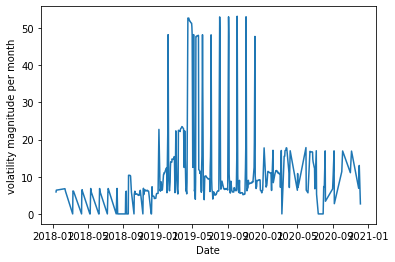

In [17]:
plt.xlabel('Date')
plt.ylabel('volatility magnitude per month')
plt.plot(df)

In [ ]:
# now calculate the stationarity bydetermining rolling mean and std 
rollmean = df.rolling(window=31).mean()
rollstd = df.rolling(window=31).std()
print(rollmean,rollstd)



              actual
date                
2018-01-10       NaN
2018-01-11       NaN
2018-02-10       NaN
2018-02-12       NaN
2018-03-09       NaN
...              ...
2020-11-06  5.832873
2020-12-01  5.836832
2020-12-02  5.646129
2020-12-03  5.894997
2020-12-07  5.982207

[437 rows x 1 columns]               actual
date                
2018-01-10       NaN
2018-01-11       NaN
2018-02-10       NaN
2018-02-12       NaN
2018-03-09       NaN
...              ...
2020-11-06  6.504602
2020-12-01  6.505222
2020-12-02  6.248559
2020-12-03  6.387411
2020-12-07  6.322366

[437 rows x 1 columns]


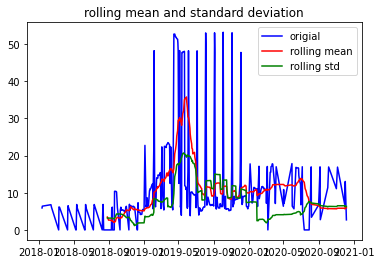

In [ ]:
#plot rolling statistics 
original =plt.plot(df, color ='blue', label ='origial')
mean = plt.plot(rollmean, color='red',label='rolling mean')
std = plt.plot(rollstd,color='green' , label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

as the roll mean and std is not constant so this is not a stationari dataset

---



In [ ]:
#another method

from statsmodels.tsa.stattools import adfuller
print('result of dickey fuller test:')
dftest = adfuller(df['actual'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test-Statistics','p-value','Lags-used','Number of Observation Used'])

for key,value in dftest[4].items():
  dfoutput['critical value(%s)'%key]=value
  print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



result of dickey fuller test:
Test-Statistics                -2.212983
p-value                         0.201567
Lags-used                      16.000000
Number of Observation Used    420.000000
critical value(1%)             -3.446016
dtype: float64
Test-Statistics                -2.212983
p-value                         0.201567
Lags-used                      16.000000
Number of Observation Used    420.000000
critical value(1%)             -3.446016
critical value(5%)             -2.868446
dtype: float64
Test-Statistics                -2.212983
p-value                         0.201567
Lags-used                      16.000000
Number of Observation Used    420.000000
critical value(1%)             -3.446016
critical value(5%)             -2.868446
critical value(10%)            -2.570449
dtype: float64


In [ ]:
df.head()

actual
date                
2018-01-10  5.914187
2018-01-11  6.390761
2018-02-10  6.786512
2018-02-12  6.088423
2018-03-09  0.000000

In [31]:
df.index

DatetimeIndex(['2018-01-10', '2018-01-11', '2018-02-10', '2018-02-12',
               '2018-03-09', '2018-03-10', '2018-03-12', '2018-04-09',
               '2018-04-10', '2018-04-11',
               ...
               '2020-10-02', '2020-10-03', '2020-10-06', '2020-11-02',
               '2020-11-03', '2020-11-06', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-07'],
              dtype='datetime64[ns]', name='date', length=437, freq=None)

In [ ]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
#df['Weekday Name'] = df.index.weekday_name
# Display a random sampling of 5 rows
df.sample(5, random_state=0)

actual     model  Year  Month
date                                       
2019-09-09  0.065899  0.179480  2019      9
2019-10-06  0.106374  0.439631  2019     10
2019-12-02  0.125230  0.278205  2019     12
2019-06-23  0.096342  0.322149  2019      6
2018-10-14  0.053133  0.189591  2018     10

In [ ]:
df.loc['2019-09-09']

actual       0.065899
model        0.179480
Year      2019.000000
Month        9.000000
Name: 2019-09-09 00:00:00, dtype: float64

In [ ]:
df.loc['2019']

actual     model  Year  Month
date                                       
2019-01-01  0.055213  0.205111  2019      1
2019-01-04  0.227481  0.474566  2019      1
2019-01-08  0.061959  0.203108  2019      1
2019-01-09  0.066468  0.191108  2019      1
2019-01-10  0.061934  0.183610  2019      1
...              ...       ...   ...    ...
2019-12-23  0.091179  0.188882  2019     12
2019-12-24  0.063685  0.184925  2019     12
2019-12-26  0.062676  0.180855  2019     12
2019-12-29  0.056731  0.177028  2019     12
2019-12-30  0.063007  0.192896  2019     12

[237 rows x 4 columns]

**Visualizing time series data**

In [32]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

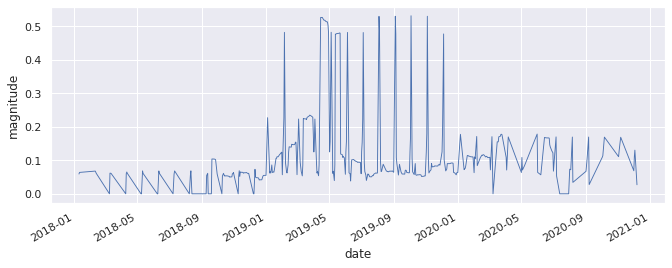

In [ ]:
ax = df['actual'].plot(linewidth=0.9);
ax.set_ylabel('magnitude');


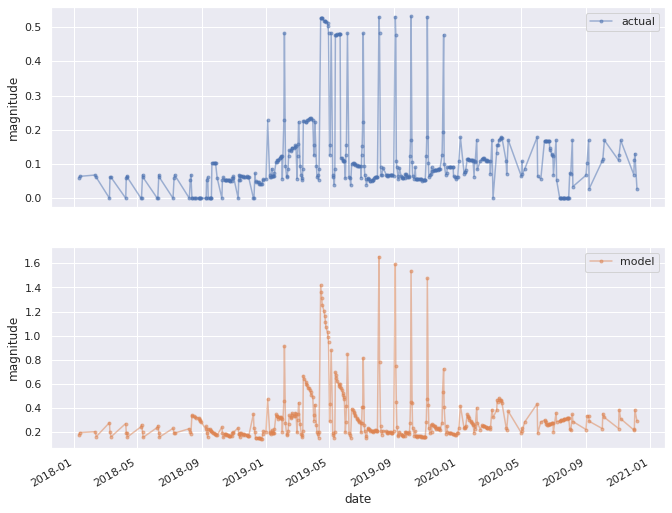

In [ ]:
cols_plot = ['actual', 'model',]
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('magnitude')

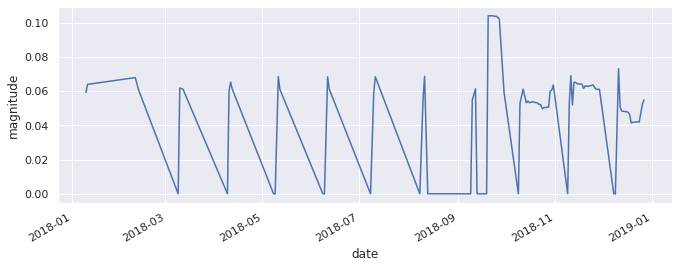

In [ ]:
ax = df.loc['2018', 'actual'].plot()
ax.set_ylabel('magnitude');

Text(0.5, 1.0, 'Monthly actual volatility')

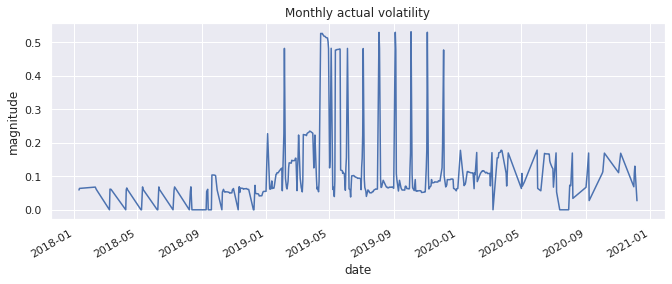

In [ ]:
ax = df.loc['2018-01':'2021-01', 'actual'].plot(marker='', linestyle='-')
ax.set_ylabel('magnitude');
ax.set_title('Monthly actual volatility')


**seasonality** 

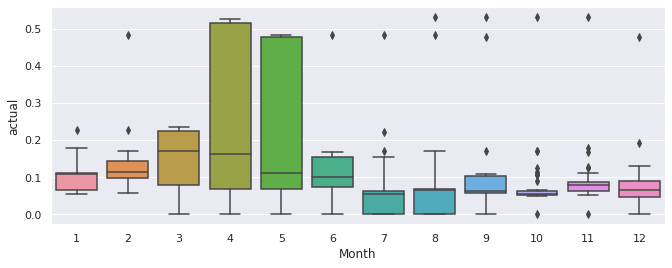

In [ ]:
sns.boxplot(data=df, x='Month', y='actual');

In [ ]:
data_columns = 'actual'

In [ ]:
df.head()

actual  Year  Month
date                             
2018-01-10  0.059142  2018      1
2018-01-11  0.063908  2018      1
2018-02-10  0.067865  2018      2
2018-02-12  0.060884  2018      2
2018-03-09  0.000000  2018      3

In [ ]:
df.drop('Year', axis=1, inplace=True)

In [ ]:
df.drop('Month', axis=1, inplace=True)

In [ ]:
df.head()

actual
date                
2018-01-10  0.059142
2018-01-11  0.063908
2018-02-10  0.067865
2018-02-12  0.060884
2018-03-09  0.000000

In [ ]:
#download df.csv in local machine
from google.colab import files
df.to_csv('vol.csv') 
files.download("vol.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_365d = df[data_columns].rolling(window=365, center=True, min_periods=360).mean()
#df_365d.fillna(0.0)

In [ ]:
df_7d = df[data_columns].rolling(7, center=True).mean()
#df_7d.fillna(0.0)

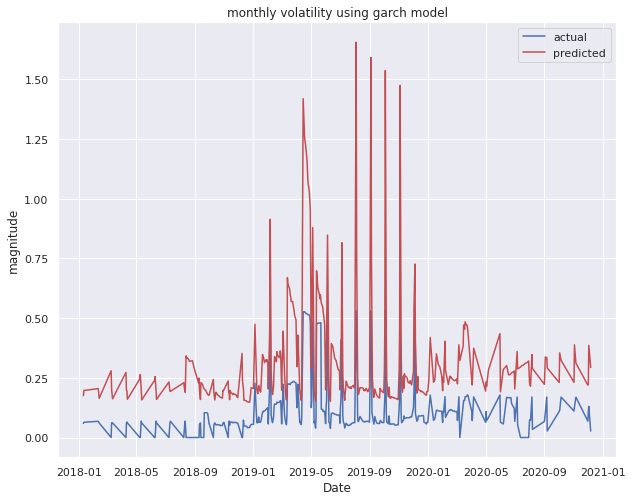

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(dff['date'], dff['actual'], 'b-', label = 'actual')
plt.plot(dff['date'], dff['model'], 'r-', label = 'predicted')
plt.xlabel('Date'); plt.ylabel('magnitude'); plt.title('monthly volatility using garch model')
plt.legend();

In [33]:
train=df[0:400] 
test=df[400:]

holtwinters

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



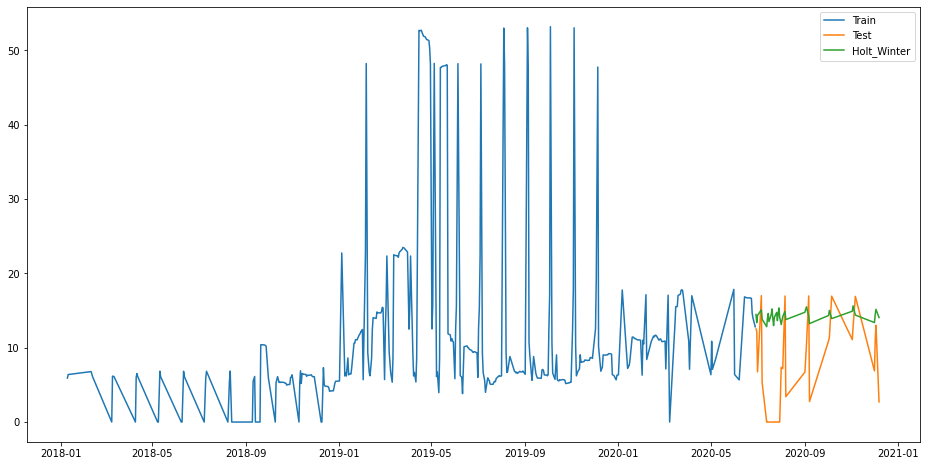

In [37]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['actual']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['actual'], label='Train')
plt.plot(test['actual'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

naive forecast

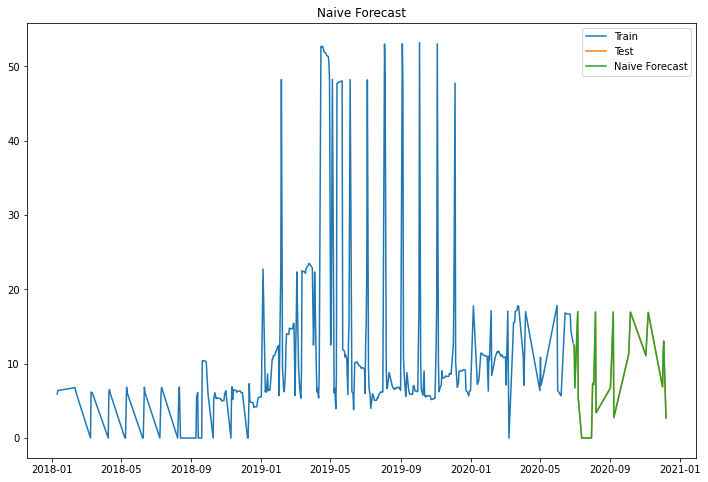

In [38]:
dd= np.asarray(train.actual)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['actual'], label='Train')
plt.plot(test.index,test['actual'], label='Test')
plt.plot(y_hat.index,y_hat['actual'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
pip install forecast_x

In [42]:
import math


In [43]:
from sklearn.metrics import mean_squared_error

rmse =mean_squared_error(y_hat.actual, y_hat.naive,squared=False)

print(rmse)


8.885645042645468


In [41]:
y_hat

actual      naive
date                            
2020-06-29  12.525931  12.814807
2020-06-30  12.248936  12.814807
2020-07-01   6.759544  12.814807
2020-07-06  17.003061  12.814807
2020-07-07   5.324406  12.814807
2020-07-13   0.000000  12.814807
2020-07-14   0.000000  12.814807
2020-07-15   0.000000  12.814807
2020-07-16   0.000000  12.814807
2020-07-19   0.000000  12.814807
2020-07-20   0.000000  12.814807
2020-07-21   0.000000  12.814807
2020-07-22   0.000000  12.814807
2020-07-23   0.000000  12.814807
2020-07-26   0.000000  12.814807
2020-07-27   0.000000  12.814807
2020-07-28   0.000000  12.814807
2020-07-29   0.000000  12.814807
2020-07-30   0.000000  12.814807
2020-08-01   7.363975  12.814807
2020-08-03   7.192589  12.814807
2020-08-06  16.960522  12.814807
2020-08-07   3.408793  12.814807
2020-09-01   6.723996  12.814807
2020-09-03  10.327850  12.814807
2020-09-06  16.967058  12.814807
2020-09-07   2.751902  12.814807
2020-10-02  10.940670  12.814807
2020-10-03  11.378213  12.814807
2020-10-06  16.939927  12.814807
2020-11-02  11.089240  12.814807
2020-11-03  12.780777  12.814807
2020-11-06  16.906557  12.814807
2020-12-01   6.882247  12.814807
2020-12-02  11.091267  12.814807
2020-12-03  13.039340  12.814807
2020-12-07   2.703493  12.814807

simple average forecast 

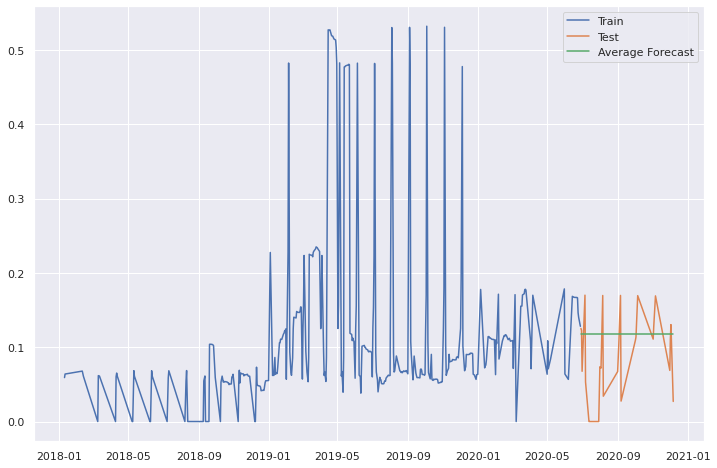

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['actual'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['actual'], label='Train')
plt.plot(test['actual'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
df.drop('model', axis=1, inplace=True)

ValueError: ignored

In [ ]:
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [ ]:
df['2018']

actual
date                
2018-01-10  0.059142
2018-01-11  0.063908
2018-02-10  0.067865
2018-02-12  0.060884
2018-03-09  0.000000
...              ...
2018-12-20  0.041716
2018-12-23  0.042048
2018-12-24  0.041939
2018-12-26  0.052325
2018-12-27  0.054831

[97 rows x 1 columns]

In [ ]:
df = df['actual'].resample('MS').mean()

In [ ]:
df['2018']

date
2018-01-01    6.152474
2018-02-01    6.437468
2018-03-01    4.098011
2018-04-01    4.666158
2018-05-01    3.233660
2018-06-01    3.239587
2018-07-01    4.236174
2018-08-01    0.947709
2018-09-01    4.972078
2018-10-01    5.139981
2018-11-01    5.798602
2018-12-01    4.156188
Freq: MS, Name: actual, dtype: float64

In [ ]:
df

date
2018-01-01    0.061525
2018-02-01    0.064375
2018-03-01    0.040980
2018-04-01    0.046662
2018-05-01    0.032337
2018-06-01    0.032396
2018-07-01    0.042362
2018-08-01    0.009477
2018-09-01    0.049721
2018-10-01    0.051400
2018-11-01    0.057986
2018-12-01    0.041562
2019-01-01    0.097117
2019-02-01    0.148100
2019-03-01    0.171897
2019-04-01    0.344200
2019-05-01    0.263044
2019-06-01    0.113299
2019-07-01    0.091028
2019-08-01    0.121377
2019-09-01    0.112130
2019-10-01    0.088509
2019-11-01    0.111724
2019-12-01    0.113035
2020-01-01    0.104364
2020-02-01    0.110807
2020-03-01    0.139058
2020-04-01    0.116656
2020-05-01    0.101159
2020-06-01    0.141431
2020-07-01    0.017110
2020-08-01    0.087315
2020-09-01    0.091927
2020-10-01    0.130863
2020-11-01    0.135922
2020-12-01    0.084291
Freq: MS, Name: actual, dtype: float64

In [ ]:
import statsmodels.api as sm

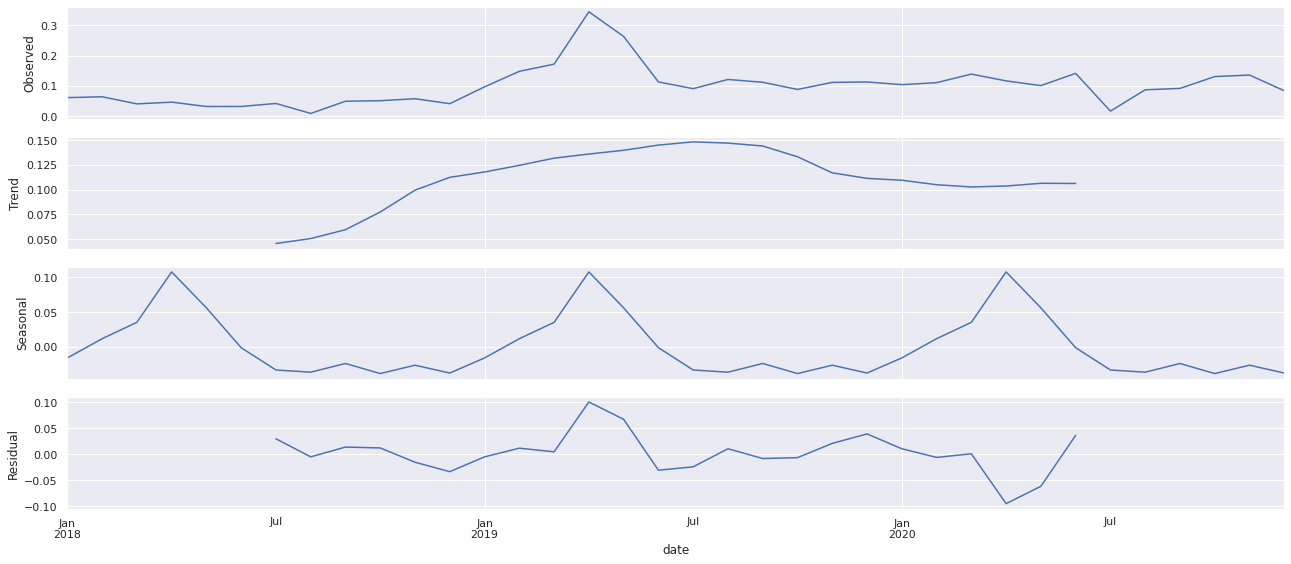

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
df_log = np.log(df)

In [ ]:
df_log_diff = df_log - df_log.shift()

KeyError: ignored

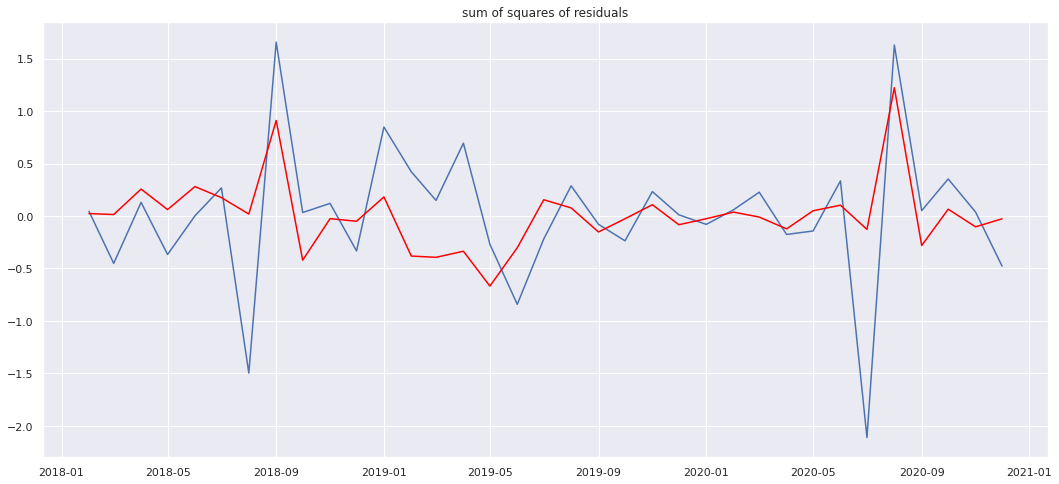

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(2,1,2))
result_MA = model.fit(disp = 1)
plt.plot(df_log_diff)
plt.plot(result_MA.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_MA.fittedvalues-df_log_diff["actual"])**2))

In [ ]:
predictions_ARIMA_Log = pd.Series(df_log[actual],)

In [ ]:
df

date
2018-01-01    0.061525
2018-02-01    0.064375
2018-03-01    0.040980
2018-04-01    0.046662
2018-05-01    0.032337
2018-06-01    0.032396
2018-07-01    0.042362
2018-08-01    0.009477
2018-09-01    0.049721
2018-10-01    0.051400
2018-11-01    0.057986
2018-12-01    0.041562
2019-01-01    0.097117
2019-02-01    0.148100
2019-03-01    0.171897
2019-04-01    0.344200
2019-05-01    0.263044
2019-06-01    0.113299
2019-07-01    0.091028
2019-08-01    0.121377
2019-09-01    0.112130
2019-10-01    0.088509
2019-11-01    0.111724
2019-12-01    0.113035
2020-01-01    0.104364
2020-02-01    0.110807
2020-03-01    0.139058
2020-04-01    0.116656
2020-05-01    0.101159
2020-06-01    0.141431
2020-07-01    0.017110
2020-08-01    0.087315
2020-09-01    0.091927
2020-10-01    0.130863
2020-11-01    0.135922
2020-12-01    0.084291
Freq: MS, Name: actual, dtype: float64

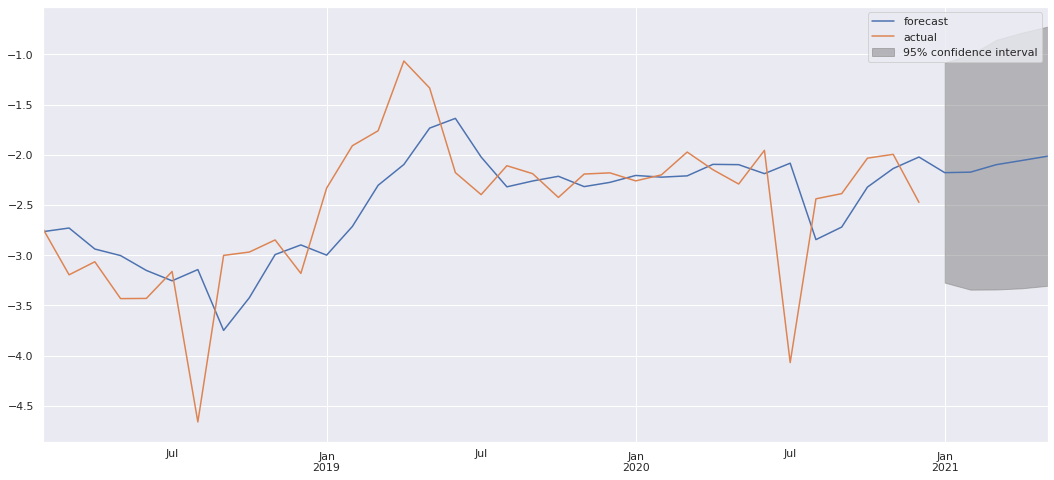

In [ ]:
result_MA.plot_predict(1,40)
x=result_MA.forecast(steps=200)

https://www.kdnuggets.com/2020/01/predict-electricity-consumption-time-series-analysis.html

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
#dta = sm.df[['actual']]
df.index = pd.date_range(start='2018-01-09', end='2021-01-30', freq='A')
res = sm.tsa.ARMA(dta, (3, 0)).fit()
fig, ax = plt.subplots()
ax = df.loc['2018-01-09':].plot(ax=ax)
fig = res.plot_predict('2021-01-01', '2021-01-30', dynamic=True, ax=ax,plot_insample=False)
plt.show()

AttributeError: ignored

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['actual'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(actual):
    result=adfuller(actual)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['actual'])

ADF Test Statistic : -2.166688387456188
p-value : 0.21855696412416248
#Lags Used : 0
Number of Observations Used : 436
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['volatility First Difference'] = df['actual'] - df['actual'].shift(1)

In [ ]:
df['actual'].shift(1)

date
2018-05-08    NaN
2018-06-08    0.0
2018-07-08    0.0
2018-08-08    0.0
2018-09-08    0.0
             ... 
2020-07-27    0.0
2020-07-28    0.0
2020-07-29    0.0
2020-07-30    0.0
2020-03-08    0.0
Name: actual, Length: 437, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['actual']-df['actual'].shift(12)

In [ ]:
df.head(14)

actual  volatility First Difference  Seasonal First Difference
date                                                                      
2018-05-08     0.0                          NaN                        NaN
2018-06-08     0.0                          0.0                        NaN
2018-07-08     0.0                          0.0                        NaN
2018-08-08     0.0                          0.0                        NaN
2018-09-08     0.0                          0.0                        NaN
2018-12-08     0.0                          0.0                        NaN
2018-08-13     0.0                          0.0                        NaN
2018-08-14     0.0                          0.0                        NaN
2018-08-16     0.0                          0.0                        NaN
2018-08-19     0.0                          0.0                        NaN
2018-08-20     0.0                          0.0                        NaN
2018-08-26     0.0                          0.0                        NaN
2018-08-27     0.0                          0.0                        0.0
2018-08-28     0.0                          0.0                        0.0

In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.639925577236619
p-value : 0.00010896486847775892
#Lags Used : 18
Number of Observations Used : 406
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


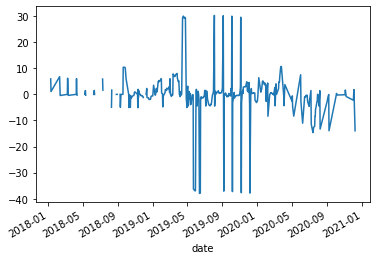

In [ ]:
df['Seasonal First Difference'].plot()

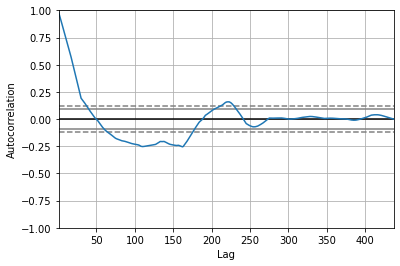

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['actual'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import statsmodels.api as sm

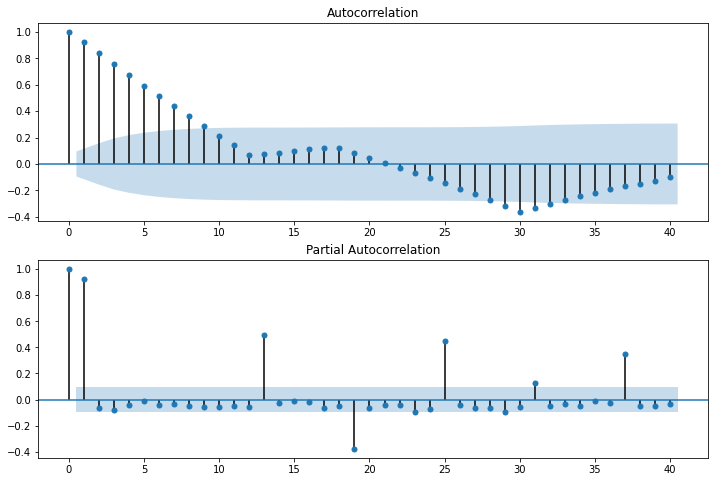

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
p(pacf)=2, q(acf)=5, d=1

SyntaxError: ignored

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['actual'],order=(3,0,4))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 actual   No. Observations:                  437
Model:                     ARMA(3, 4)   Log Likelihood                -999.354
Method:                       css-mle   S.D. of innovations              2.363
Date:                Sun, 06 Dec 2020   AIC                           2016.708
Time:                        14:55:31   BIC                           2053.428
Sample:                             0   HQIC                          2031.198
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.8232      1.161     10.183      0.000       9.548      14.099
ar.L1.actual     1.0033      0.017     60.064      0.000       0.971       1.036
ar.L2.actual     0.9433      0.027     34.990      0.000       0.890       0.996
ar.L3.actual    -0.9480      0.017    -56.808      0.000      -0.981      -0.915
ma.L1.actual    -0.0012      0.054     -0.021      0.983      -0.107       0.105
ma.L2.actual    -0.9609      0.053    -18.096      0.000      -1.065      -0.857
ma.L3.actual     0.0003      0.050      0.006      0.995      -0.098       0.099
ma.L4.actual    -0.0382      0.049     -0.775      0.439      -0.135       0.058
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0292           -0.0000j            1.0292           -0.5000
AR.2            1.0121           -0.0244j            1.0124           -0.0038
AR.3            1.0121           +0.0244j            1.0124            0.0038
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -1.0008           -0.0000j            1.0008           -0.5000
MA.3            0.0043           -5.1113j            5.1113           -0.2499
MA.4            0.0043           +5.1113j            5.1113            0.2499
-----------------------------------------------------------------------------
"""

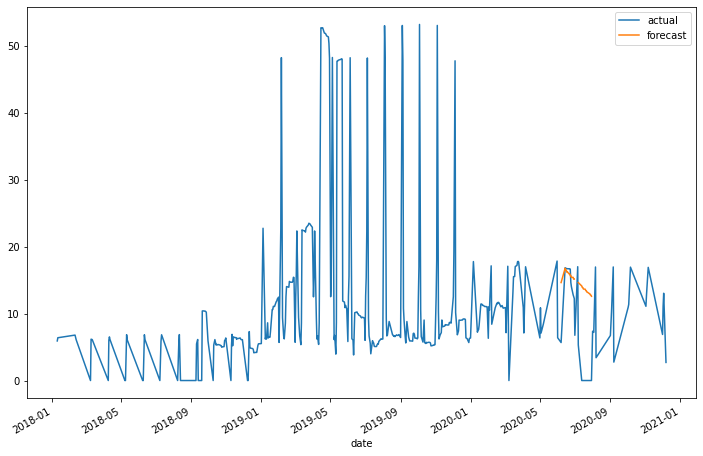

In [ ]:
df['forecast']=model_fit.predict(start=400, end=436,dynamic=True)
df[['actual','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['actual'],order=(3, 0, 4),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



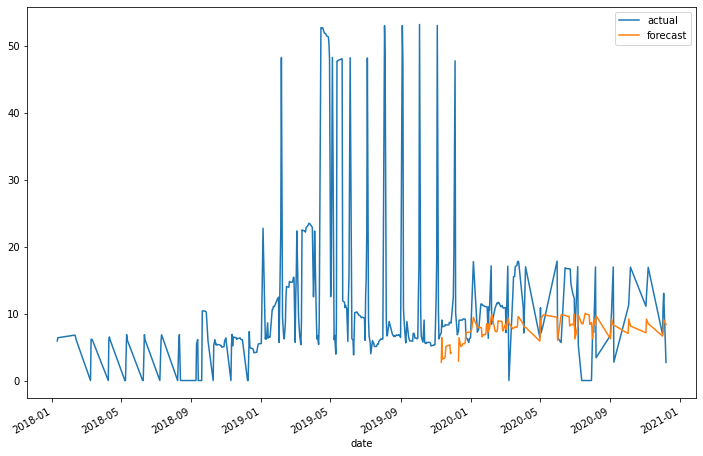

In [ ]:
df['forecast']=results.predict(start=300,end=436,dynamic=True)

model = df['forecast']
df[['actual','forecast']].plot(figsize=(12,8))

In [ ]:
df.tail()

actual  ...   forecast
date                   ...           
2020-11-06  16.906557  ...  13.070342
2020-12-01   6.882247  ...  14.724960
2020-12-02  11.091267  ...  14.120875
2020-12-03  13.039340  ...  11.966901
2020-12-07   2.703493  ...  12.111466

[5 rows x 4 columns]

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ timedelta(days=x)for x in range(1,31)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



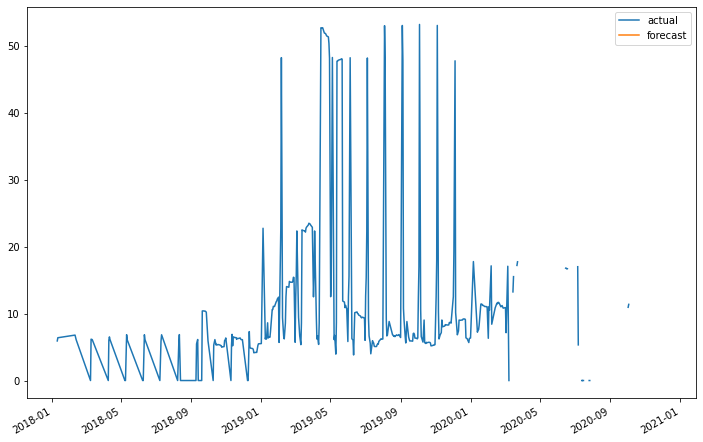

In [ ]:
future_df['forecast'] = results.predict(start = 400, end =440, dynamic= True)  
future_df[['actual', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
df.head()

actual  ...  forecast
date                  ...          
2018-01-10  5.914187  ...       NaN
2018-01-11  6.390761  ...       NaN
2018-02-10  6.786512  ...       NaN
2018-02-12  6.088423  ...       NaN
2018-03-09  0.000000  ...       NaN

[5 rows x 4 columns]

In [ ]:
results.predict_future(days=10)

AttributeError: ignored

In [ ]:
model, model_data = df.create_prophet_model(days=90)

AttributeError: ignored